In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import utils as ut
import lom


%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater

#?? Define regions, pipeline for cleaning up glodap data and binning to regions (run once via 'horse' flag)

In [2]:
# regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

# regdict = {'ARCTIC' : {'number' : 0.5},
#            'P1' : {'number': 1.0},
#           'P2' : {'number': 1.2},
#            'P3' : {'number': 1.4},
#            'P4' : {'number': 1.6},
#            'P5' : {'number': 1.8},
#             'A1' : {'number': 2.4},
#           'A2' : {'number': 2.6},
#            'A3' : {'number': 2.8},
#            'A4' : {'number': 3},
#            'A5' : {'number': 3.2},
#            'I3' : {'number': 3.6},
#            'I4' : {'number': 3.8},
#            'I5' : {'number': 4},
           
#           }
    
# tics = []
# tcm = 'Spectral'
# tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

# maskno = np.zeros([149,182])
# for i in range(0, len(regs)):
#     maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
#     tics.append(regdict[regs[i]]['number'])
# maskno[maskno == 0] = np.nan

# w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
# cbar = plt.colorbar(w, ticks=tics)
# t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
# plt.suptitle('ocean regions, subdivided')

# fact = 0.2
# fig = plt.figure(figsize=(30*fact,15*fact))
# import matplotlib
# cmap = matplotlib.cm.get_cmap('Spectral')
# norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
# for i in range(0,len(regs)):
#     rgba = cmap(norm(regdict[regs[i]]['number']))
#     plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
#     regdict[regs[i]]['colour'] = rgba
# plt.legend(ncol = 5, fontsize = 10)
# plt.suptitle('check that norm of colours works')

# Read model data, 1990-2020

In [3]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

baseDir = '/gpfs/data/greenocean/software/runs/'
tr = 'TOM12_TJ_GEA0'
yrst = 1990
yrend = 2020
dtype = 'ptrc'

tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)

tdat = xr.open_mfdataset(tylist)
tw = tdat

In [4]:
print(tw.head(5))

<xarray.Dataset>
Dimensions:               (y: 5, x: 5, deptht: 5, time_counter: 5,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 35.01 45.01
    time_centered         (time_counter) object dask.array<chunksize=(5,), meta=np.ndarray>
  * time_counter          (time_counter) object 1990-01-16 12:00:00 ... 1990-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/34)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(5, 5, 2), meta=np.ndarray>
    Alkalini              (time_counter, deptht, y, x) float32 dask.array<chunksize=(5, 5, 5, 5), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(5, 2), meta=np.ndarray>
    time_counter_bounds  

# ?? global map 
- (too much data to plot)

Text(0.5, 1.0, 'DIC')

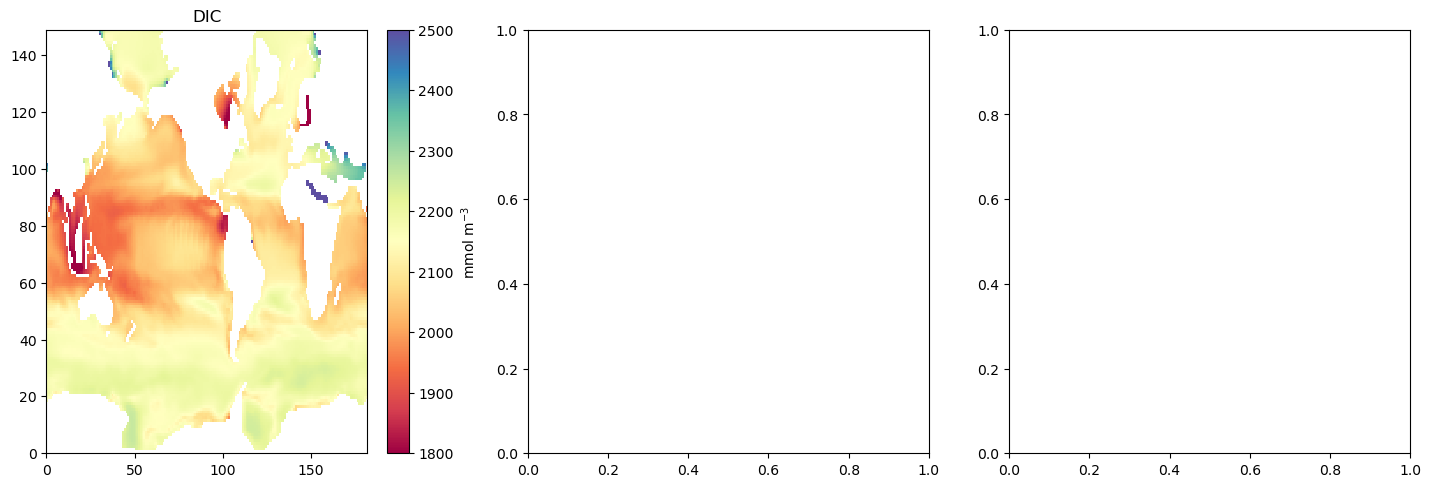

In [5]:
fact = 1e6
scal = 1.1
fig, axs = plt.subplots(1,3, figsize=(16*scal, 5*scal), facecolor='w', edgecolor='k')
axs = axs.ravel()
tlab = 'mmol m$^{-3}$'
tvar = 'DIC'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[0].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[0])
axs[0].set_title(tvar)



In [6]:
# tlab = 'mmol m$^{-3}$'
# tvar = 'Alkalini'
# tdic = tw[tvar].values* fact
# tdic[tdic == 0] = np.nan
# w = axs[1].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
# plt.colorbar(w, label = tlab, ax = axs[1])
# axs[1].set_title(tvar)

# tlab = 'mmol m$^{-3}$'
# tvar = 'DIC'
# tdic = tw[tvar].values* fact
# tvar2 = 'Alkalini'
# tdic2 = tw[tvar2].values* fact
# tdic3 = tdic2 - tdic #Alkalinity- DIC

# tdic3[tdic3 == 0] = np.nan
# w = axs[2].pcolormesh(tdic3[0,0,:,:], cmap = 'Spectral', vmin = -0, vmax = 500)
# plt.colorbar(w, label = tlab, ax = axs[2])
# axs[2].set_title('Alkalini - DIC')


# Surface DIC & ALK trend, 1990-2020

In [7]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] # area of grid cells
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

In [8]:
## weighted mean DIC

DIC_ts = tdat.DIC.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y']) #surface DIC
TA_ts = tdat.Alkalini.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

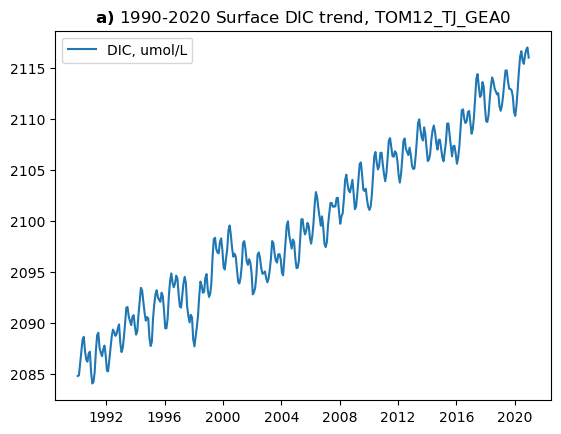

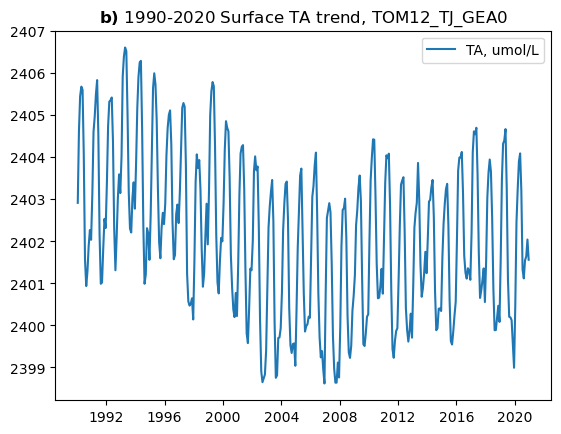

In [9]:
#multiply by 1e6 to get from mol/L to micromol/L 
dtimes = DIC_ts.indexes['time_counter'].to_datetimeindex()
plt.figure()
plt.plot(dtimes, DIC_ts*1e6, label = 'DIC, umol/L')
plt.title(r'$\bf{a)}$ 1990-2020 Surface DIC trend, TOM12_TJ_GEA0')
plt.legend()

plt.figure()
plt.plot(dtimes, TA_ts*1e6, label = 'TA, umol/L')
plt.title(r'$\bf{b)}$ 1990-2020 Surface TA trend, TOM12_TJ_GEA0')
plt.legend()

# Depth plots

In [10]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
depths = (tmesh['gdept_1d'][0])

In [11]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]


RWdict= {'TOM12_RW_TES2' : {'name' : 'milestone', 'color' : 'darkcyan'},
         'TOM12_RW_3G09' : {'name' : 'top grazer' , 'color' : 'rebeccapurple'} ,
         'TOM12_RW_3G30' : {'name' : 'pPFT & nutrients', 'color' : 'violet'},
         'TOM12_RW_3G32' : {'name' : 'carbon flux' , 'color' : 'firebrick'},
         'TOM12_RW_3G34' : {'name' : 'combination' , 'color' : 'orange'}}
RWmods = ['TOM12_RW_TES2', 'TOM12_RW_3G09', 'TOM12_RW_3G30', 'TOM12_RW_3G32' ,'TOM12_RW_3G34']

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]


for r in range(0, len(RWmods)):
    yst = 1955; yen = 1960; dtype = 'ptrc_T'; modnam = RWmods[r]
    ylist = ut.make_yearlist(yst, yen, dtype, modnam)
    tdat = xr.open_mfdataset(ylist)

    DIC = np.nanmean(tdat.DIC.resample(time_counter="Y").mean().values, axis = 0)
    ALK = np.nanmean(tdat.Alkalini.resample(time_counter="Y").mean().values, axis = 0)



    DIC_mean = np.zeros([31])
    ALK_mean = np.zeros([31])
    for i in range(0,31):
        DIC_mean[i] = np.ma.average(DIC[i,:,:], weights = cvol[i,:,:]) * 1e6
        ALK_mean[i] = np.ma.average(ALK[i,:,:], weights = cvol[i,:,:]) * 1e6
        
    # print(DIC_mean)
    RWdict[modnam]['DIC_mean'] = DIC_mean
    RWdict[modnam]['ALK_mean'] = ALK_mean